## Imports


In [4]:
import pandas as pd
import os
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

In [5]:

%cd '/home/usr/Documents/reg-class-fault-detection/dataset/train_test_dataset_Fault Impact Analysis/'


/home/usr/Documents/reg-class-fault-detection/dataset/train_test_dataset_Fault Impact Analysis


/home/usr/anaconda3/envs/cnn-env/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Organizando os dados

O número após o underline indica uma sequência em que os csvs de uma mesma estação radio base foram coletados. Em primeira análise, parece que são perfeitamente continuos. Onde o _1 parou, o _2 começa e assim vai.

In [6]:
def sortfunc1(element):


  el_arr = element.split("_")
  f = el_arr[0]
  n = "".join(f)

  return (n)

In [7]:
def sortfunc2(element):


  el_arr = element.split("_")
  f = filter(str.isnumeric, el_arr[1])
  n = "".join(f)

  return (int(n))

In [8]:
csv_list = os.listdir()

print(csv_list)

['B0253-123_1.csv.csv', 'B0015-22_1.csv.csv', 'B0434-15_7.csv.csv', 'B0686-15_9.csv.csv', 'B0605-35_8.csv.csv', 'B0677-22_2.csv.csv', 'B0690-25_16.csv.csv', 'B0518-35_30.csv.csv', 'B0388-35_10.csv.csv', 'B0429-33_3.csv.csv', 'B0283-42_1.csv.csv', 'B0576-12_30.csv.csv', 'B0311-32_1.csv.csv', 'B0406-22_1.csv.csv', 'B0630-15_22.csv.csv', 'B0689-15_1.csv.csv', 'B0372-115_2.csv.csv', 'B0518-32_16.csv.csv', 'B0689-22_2.csv.csv', 'B0640-12_1.csv.csv', 'B0440-15_1.csv.csv', 'B0605-32_18.csv.csv', 'B0178-35_11.csv.csv', 'B0435-22_13.csv.csv', 'B0687-123_1.csv.csv', 'B0442-32_1.csv.csv', 'B0279-22_2.csv.csv', 'B0286-125_1.csv.csv', 'B0210-35_1.csv.csv', 'B0389-12_1.csv.csv', 'B0446-12_4.csv.csv', 'B0429-23_1.csv.csv', 'B0631-12_4.csv.csv', 'B0546-32_1.csv.csv', 'B0351-82_1.csv.csv', 'B0450-12_4.csv.csv', 'B0010-42_1.csv.csv', 'B0619-12_2.csv.csv', 'B0483-15_1.csv.csv', 'B0017-25_23.csv.csv', 'B0435-23_6.csv.csv', 'B0630-12_9.csv.csv', 'B0446-23_2.csv.csv', 'B0576-15_7.csv.csv', 'B0471-15_1.csv.c

In [9]:
len(csv_list)

7258

### ordenation

In [10]:
dataset = []
for el1 in csv_list:
  new_list = []
  criteria = sortfunc1(el1)

  for el2 in csv_list:
    if(criteria == sortfunc1(el2)):
      new_list.append(el2)

  dataset.append(new_list)

  for el3 in new_list:
    csv_list.remove(el3)



In [11]:
for group in dataset:
  group.sort(key=sortfunc2)

dataset

[['B0253-123_1.csv.csv'],
 ['B0434-15_1.csv.csv',
  'B0434-15_2.csv.csv',
  'B0434-15_3.csv.csv',
  'B0434-15_4.csv.csv',
  'B0434-15_5.csv.csv',
  'B0434-15_6.csv.csv',
  'B0434-15_7.csv.csv',
  'B0434-15_8.csv.csv',
  'B0434-15_9.csv.csv',
  'B0434-15_10.csv.csv',
  'B0434-15_11.csv.csv',
  'B0434-15_12.csv.csv',
  'B0434-15_13.csv.csv',
  'B0434-15_14.csv.csv',
  'B0434-15_15.csv.csv'],
 ['B0605-35_1.csv.csv',
  'B0605-35_2.csv.csv',
  'B0605-35_3.csv.csv',
  'B0605-35_4.csv.csv',
  'B0605-35_5.csv.csv',
  'B0605-35_6.csv.csv',
  'B0605-35_7.csv.csv',
  'B0605-35_8.csv.csv',
  'B0605-35_9.csv.csv',
  'B0605-35_10.csv.csv',
  'B0605-35_11.csv.csv',
  'B0605-35_12.csv.csv',
  'B0605-35_13.csv.csv',
  'B0605-35_14.csv.csv',
  'B0605-35_15.csv.csv',
  'B0605-35_16.csv.csv',
  'B0605-35_17.csv.csv',
  'B0605-35_18.csv.csv',
  'B0605-35_19.csv.csv',
  'B0605-35_20.csv.csv',
  'B0605-35_21.csv.csv',
  'B0605-35_22.csv.csv',
  'B0605-35_23.csv.csv',
  'B0605-35_24.csv.csv',
  'B0605-35_25.c

In [12]:
d = dataset[:300]

## continue

In [13]:
def getFrames(d):

    frames = []
    for l in d:
        for name in l:
            if name.endswith('.csv'):
                df = pd.read_csv(name)
                frames.append(df)

    return frames   

In [14]:
def getFrames2(d):

    frames = []

    for name in d:
        if name.endswith('.csv'):
            df = pd.read_csv(name)
            frames.append(df)

    return frames 

In [15]:
# frames_partial = getFrames(d)
# all_frames = getFrames(dataset)
all_frames = getFrames2(csv_list)

In [16]:
len(all_frames)

1535

In [17]:
# df_main = pd.concat(frames_partial, ignore_index= True)

# print("length of main df: " + str(len(df_main)))

df_complete = pd.concat(all_frames, ignore_index= True)

print("length of complete df: " + str(len(df_complete)))


length of complete df: 413430


## Data Treatment

In [18]:
df_main = df_complete
fault_df = df_complete[df_complete['fault_duration'] > 0]

In [19]:
fault_df = fault_df[fault_df['relation'] > 0.98]
no_fault_df = df_main[df_main['relation'] == 0]
df_main = pd.concat([fault_df, no_fault_df])
df_main = df_main.sample(frac=1)

df_main.describe()

,access_success_rate,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,fault_duration,relation
count,386047.000000,386047.000000,386047.000000,386047.000000,386047.000000,386047.000000,387724.000000,387724.000000,387724.000000
mean,96.013514,22.815160,1.967546,10.091739,8.075778,8.240976,17.926539,185.433651,0.053036
std,18.838329,22.715215,1.237062,4.532676,2.395410,3.361246,17.130142,793.044306,0.223498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.769053,4.904174,1.229061,8.392068,6.797510,6.462392,6.288928,0.000000,0.000000
50%,99.965517,14.911000,1.673581,10.408826,7.938510,8.356800,12.715232,0.000000,0.000000
75%,100.000000,33.748000,2.306088,11.784046,9.375024,10.208791,24.077887,0.000000,0.000000
max,100.000000,99.908511,7.031414,100.000000,15.000000,27.323729,430.021258,3600.000000,1.000000


In [20]:
df_main = df_main.drop(columns=['NE ID','endTime', 'relation'])
df_main = df_main.dropna()
df_main

,access_success_rate,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,fault_duration
57325,99.218750,14.814000,3.269688,9.077522,6.349592,8.124024,6.682396,0.0
28766,0.000000,1.512000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
222284,99.979360,19.219000,1.260055,10.223336,10.181213,12.317568,18.103954,0.0
393334,99.914603,16.061000,5.030682,9.629808,7.866571,9.150917,24.959662,0.0
383353,99.963938,7.832000,1.217640,6.907080,9.950034,7.643802,21.154863,0.0
...,...,...,...,...,...,...,...,...
213871,99.766355,24.164000,1.729800,10.406468,7.265911,9.325605,13.557485,0.0
52788,84.313725,3.538000,6.366071,22.560111,5.329512,4.281286,2.216985,0.0
171296,100.000000,4.476000,1.523810,9.073406,6.999566,12.638399,21.689839,0.0
2768,100.000000,9.631915,1.539280,8.779922,7.041997,7.188057,12.126117,0.0


In [21]:
fault = df_main[df_main['fault_duration'] != 0]


In [22]:
small_faults = fault[fault['fault_duration'] < 500]

In [23]:
def label_func(faultD):
  if(faultD == 0):
    return 0
  elif(faultD < 500):
    return 1
  else:
    return 2

def bin_func(faultD):
  if(faultD == 0):
    return 0
  else:
    return (faultD//500 + 1)

In [24]:
df_main['fault_label'] = df_main['fault_duration'].apply(label_func)
df_main['bin'] = df_main['fault_duration'].apply(bin_func)

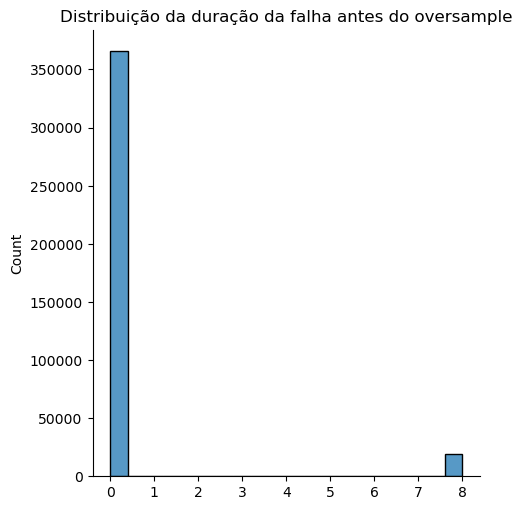

In [23]:
sn.displot(x=df_main['bin'].values).set(title=f"Distribuição da duração da falha antes do oversample")

In [33]:
df_desc = df_main.describe()
df_desc.T['max'].values

array([1.00000000e+02, 9.99085106e+01, 7.03141361e+00, 1.00000000e+02,
       1.50000000e+01, 2.73237288e+01, 4.30021258e+02, 3.60000000e+03,
       2.00000000e+00, 8.00000000e+00])

In [34]:
df_main.drop(columns="fault_duration").to_csv("/home/usr/Documents/notebooks/df_untreated_no_fd.csv")

In [38]:
a = np.array([0,1,2,3,4,5])
b = np.array([3,2,4,5,1,3])

np.sum(a < b)

4

In [42]:

len(df_main)/10

38604.7

In [43]:
df_main.describe().T['max'].values

array([1.00000000e+02, 9.99085106e+01, 7.03141361e+00, 1.00000000e+02,
       1.50000000e+01, 2.73237288e+01, 4.30021258e+02, 3.60000000e+03,
       2.00000000e+00, 8.00000000e+00])

## Normalização

In [24]:
X_df = df_main.copy()
X_df = X_df.drop(columns=['fault_duration', 'fault_label','bin'])


In [25]:
from sklearn.preprocessing import MinMaxScaler

scalerMinMax = MinMaxScaler()
df_scaled = X_df.copy()


X_std  = scalerMinMax.fit_transform(df_scaled)
df_scaled[['access_success_rate', 'resource_utilition_rate', 'TA', 'bler', 'cqi',
       'mcs', 'data_rate']] = X_std


df_scaled['fault_duration'] = df_main['fault_duration']
df_scaled['fault_label'] = df_main['fault_label']
df_scaled['bin'] = df_main['bin']

df_scaled

,access_success_rate,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,fault_duration,fault_label,bin
358246,1.000000,0.185350,0.302994,0.092368,0.531722,0.325120,0.068116,0.0,0,0.0
302363,0.995016,0.186210,0.633000,0.116403,0.401129,0.290067,0.024130,0.0,0,0.0
385660,0.998592,0.950640,0.364291,0.132468,0.390854,0.220550,0.007019,0.0,0,0.0
229812,1.000000,0.136635,0.230238,0.102163,0.630210,0.384009,0.051141,0.0,0,0.0
278465,1.000000,0.043146,0.542231,0.091850,0.687338,0.221240,0.030073,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
353156,1.000000,0.097309,0.420674,0.097339,0.579131,0.397059,0.032744,0.0,0,0.0
31715,0.994898,0.139207,0.620297,0.078699,0.483154,0.231510,0.028979,0.0,0,0.0
381963,1.000000,0.282439,0.200277,0.105317,0.471985,0.384260,0.044211,0.0,0,0.0
293155,0.994318,0.324237,0.292012,0.118666,0.433433,0.286895,0.009805,0.0,0,0.0


## SMOTE

In [26]:
df_x2 = df_scaled.copy()
y_bin = df_x2['bin'].values
df_x2 = df_x2.drop(columns=['fault_label','bin'])
X_std2 = df_x2.values

In [27]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto',random_state=15)

X_res, y_bin_res = sm.fit_resample(X_std2, y_bin)


In [28]:
def faultlabel(b):
  if(b == 0): return 0
  elif(b == 1): return 1
  else: return 2

In [29]:
y_label_res = [faultlabel(b) for b in y_bin_res ]

In [30]:
X_res_7d = np.delete(X_res, 7, axis=1)


In [31]:
df_labeled_res = pd.DataFrame()
df_labeled_res[['access_success_rate', 'resource_utilition_rate', 'TA', 'bler', 'cqi','mcs', 'data_rate','fault_duration']] = X_res
df_labeled_res['bin'] = y_bin_res
df_labeled_res['fault'] = y_label_res

df_labeled_res

,access_success_rate,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,fault_duration,bin,fault
0,1.000000,0.185350,0.302994,0.092368,0.531722,0.325120,0.068116,0.0,0.0,0
1,0.995016,0.186210,0.633000,0.116403,0.401129,0.290067,0.024130,0.0,0.0,0
2,0.998592,0.950640,0.364291,0.132468,0.390854,0.220550,0.007019,0.0,0.0,0
3,1.000000,0.136635,0.230238,0.102163,0.630210,0.384009,0.051141,0.0,0.0,0
4,1.000000,0.043146,0.542231,0.091850,0.687338,0.221240,0.030073,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
3290728,0.000000,0.017037,0.000000,0.000000,0.000000,0.000000,0.000000,3600.0,8.0,2
3290729,1.000000,0.034571,0.169215,0.093950,0.757258,0.336207,0.131840,3600.0,8.0,2
3290730,1.000000,0.023746,0.149107,0.047332,0.843090,0.294280,0.124172,3600.0,8.0,2
3290731,0.999475,0.282889,0.265550,0.108524,0.657067,0.412566,0.069371,3600.0,8.0,2


In [32]:
df_labeled_res['fault_duration'].mean()

1760.1663441635953

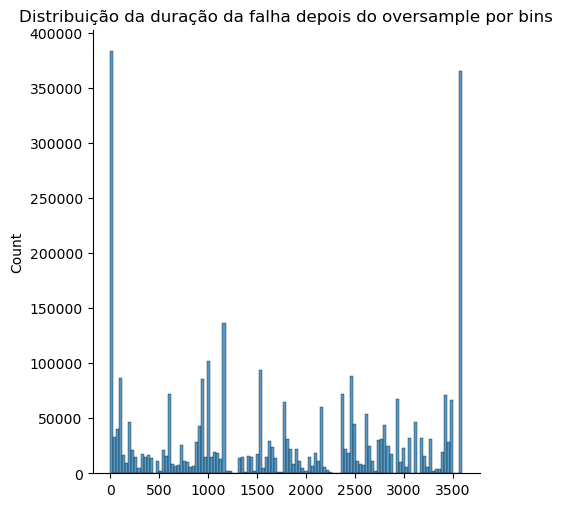

In [35]:
sn.displot(x=df_labeled_res['fault_duration'].values).set(title=f"Distribuição da duração da falha depois do oversample por bins")

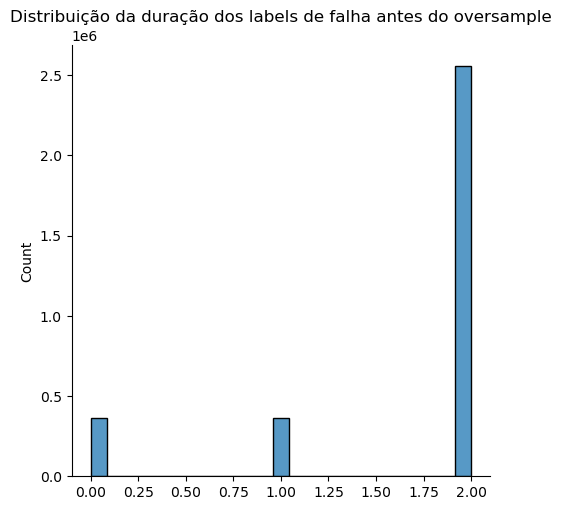

In [36]:
sn.displot(x=df_labeled_res['fault'].values).set(title=f"Distribuição da duração dos labels de falha antes do oversample")

In [34]:
len(df_labeled_res)

3290733

In [37]:
df_0 = df_labeled_res[df_labeled_res['fault'] == 0]
df_1 = df_labeled_res[df_labeled_res['fault'] == 1]
df_2 = df_labeled_res[df_labeled_res['fault'] == 2]

df_2 = df_2.sample(frac= 0.2)

In [38]:
a = len(df_0) + len(df_1) + len(df_2)
print(a)

1243166


In [39]:
df_eq = pd.concat([df_0,df_1,df_2])
df_eq = df_eq.sample(frac=1)

Diminuindo a quantidade de registros para facilitar a execução dos modelos.

In [92]:
df_eq = df_eq.sample(frac=0.2)

In [94]:
len(df_eq)

549532

In [95]:
X = df_eq[['access_success_rate', 'resource_utilition_rate', 'TA', 'bler', 'cqi','mcs', 'data_rate','fault_duration']].values
y = df_eq['fault']

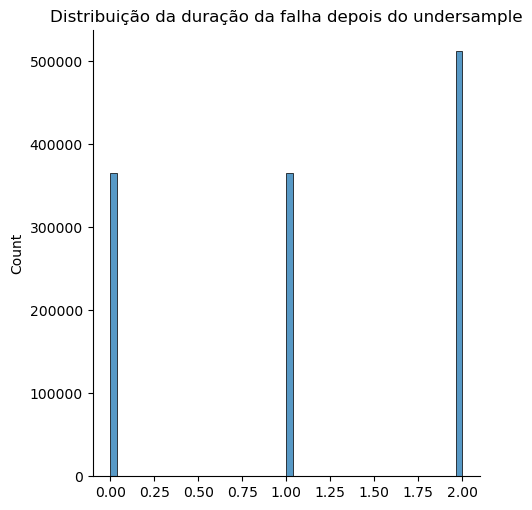

In [40]:
sn.displot(x=df_eq['fault'].values).set(title=f"Distribuição da duração da falha depois do undersample")

In [42]:
df_eq.to_csv("/home/usr/Documents/notebooks/classification_df_treated_balanced.csv")

inclui o fault_duration em X e remove manualmente após o split com np.delete(axis=1)

In [108]:
X_train_fd, X_test_fd, y_train_res, y_test_res = train_test_split(X, y , test_size=0.2, random_state=42)

In [109]:
X_train_res = np.delete(X_train_fd, 7, axis=1)
X_test_res = np.delete(X_test_fd, 7, axis=1)

## **EXPLORATORY ANALYSIS**

In [99]:
import plotly.express as px
import plotly.graph_objects as go

In [100]:
def correlation(df):

  font = {'family' : 'serif', 'weight' : 'bold', 'size':10}
  plt.rc('font', **font)

  corr_matrix = df.corr()
  sn.heatmap(corr_matrix, annot=True)
  plt.show()

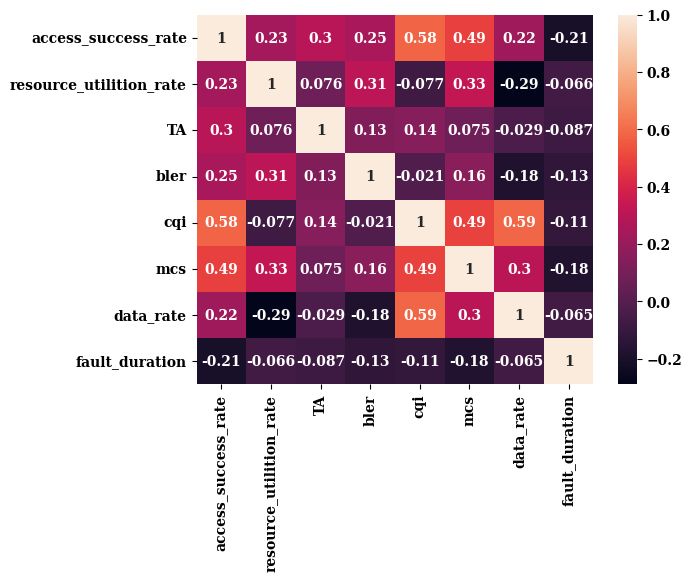

In [101]:
correlation(df_eq.drop(columns=['bin', 'fault']))

In [47]:
def kdedist(dt, h="fault"):
  metrics = [ 'TA','bler', 'cqi', 'mcs']
  fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

  k = 0
  for i in range(2):
    for j in range(2):
      sn.kdeplot(ax=axes[i][j], data=dt, x=metrics[k], hue=h, palette=['blue', 'green','red']).set(title=f"Distribuição de {metrics[k]}")
      k = k+1


In [48]:
def scatterdist(dt, h="fault"):
  metrics = [ 'TA','bler', 'cqi', 'mcs']
  fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

  k = 0
  for i in range(2):
    for j in range(2):
      axes[i][j].title.set_text(metrics[k])
      axes[i][j].scatter(x= dt["fault_duration"],y = dt[metrics[k]], s=1)
      k = k+1


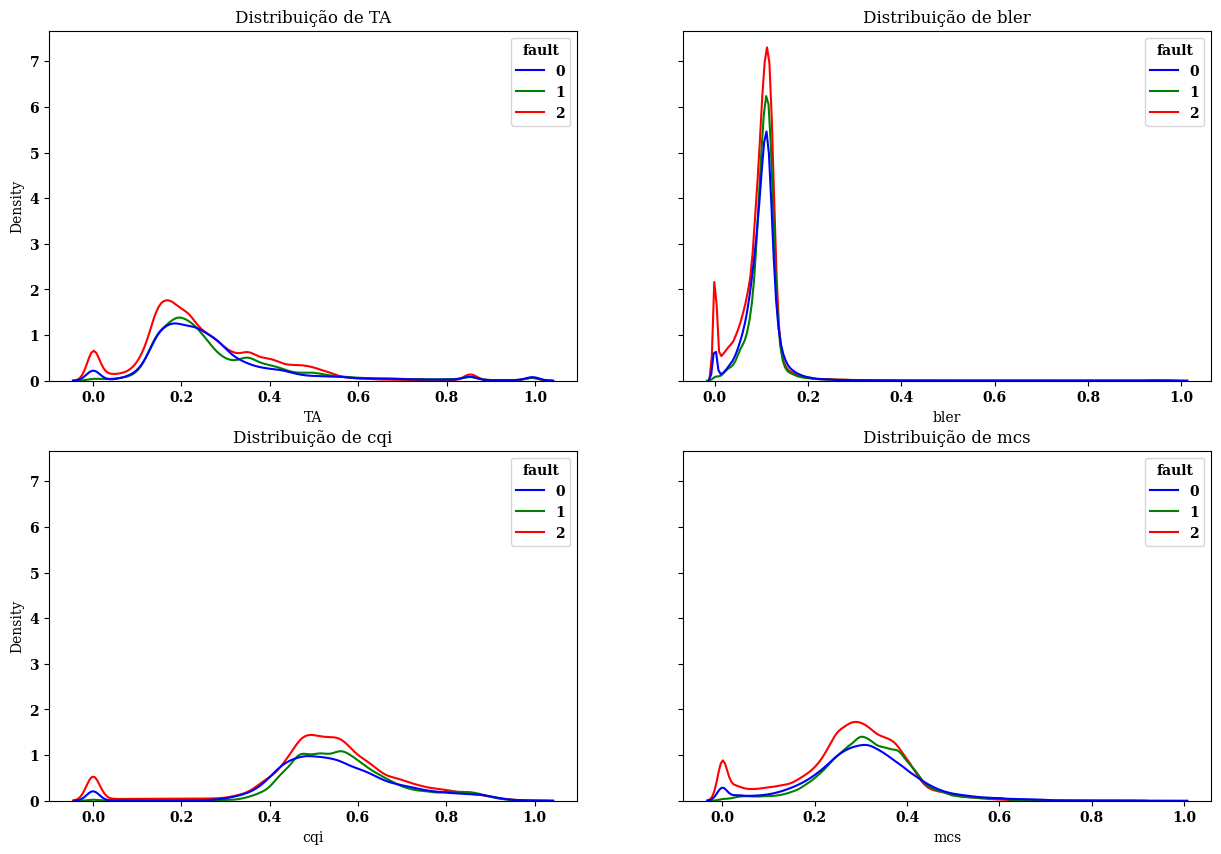

In [102]:
kdedist(df_eq)

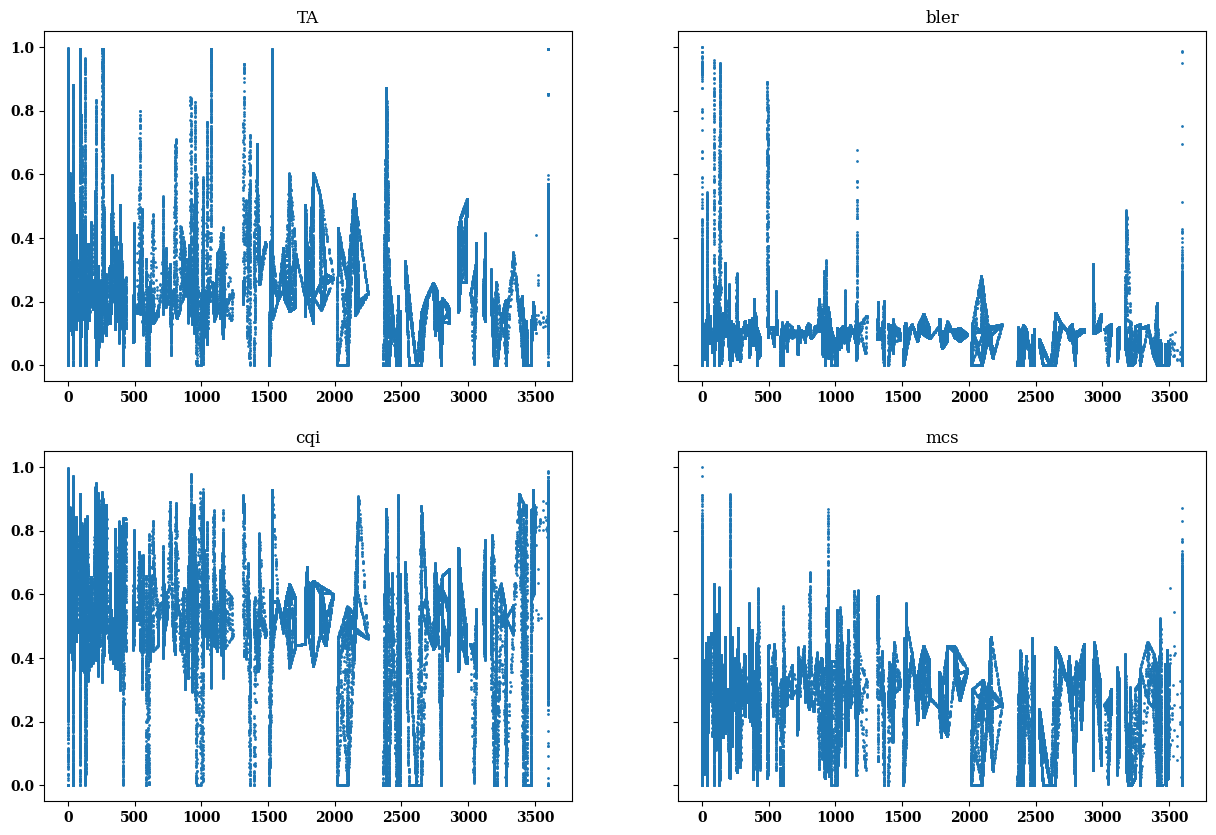

In [50]:
scatterdist(df_eq.sample(frac=0.4))

In [51]:
import seaborn as sn

In [52]:
def boxplots(dt, h="fault"):
  
    font = {'family' : 'serif', 'weight' : 'bold', 'size':8}
    plt.rc('font', **font)
    plt.show()

    metrics = ['TA','bler', 'cqi', 'mcs', 'data_rate']
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

    k = 0
    for i in range(2):
        for j in range(3):
            try:
                sn.boxplot(ax=axes[i][j], data=dt, y=metrics[k], hue=h).set(title=f"Boxplot de {metrics[k]}")
                
                k = k+1
            except:
                
                pass

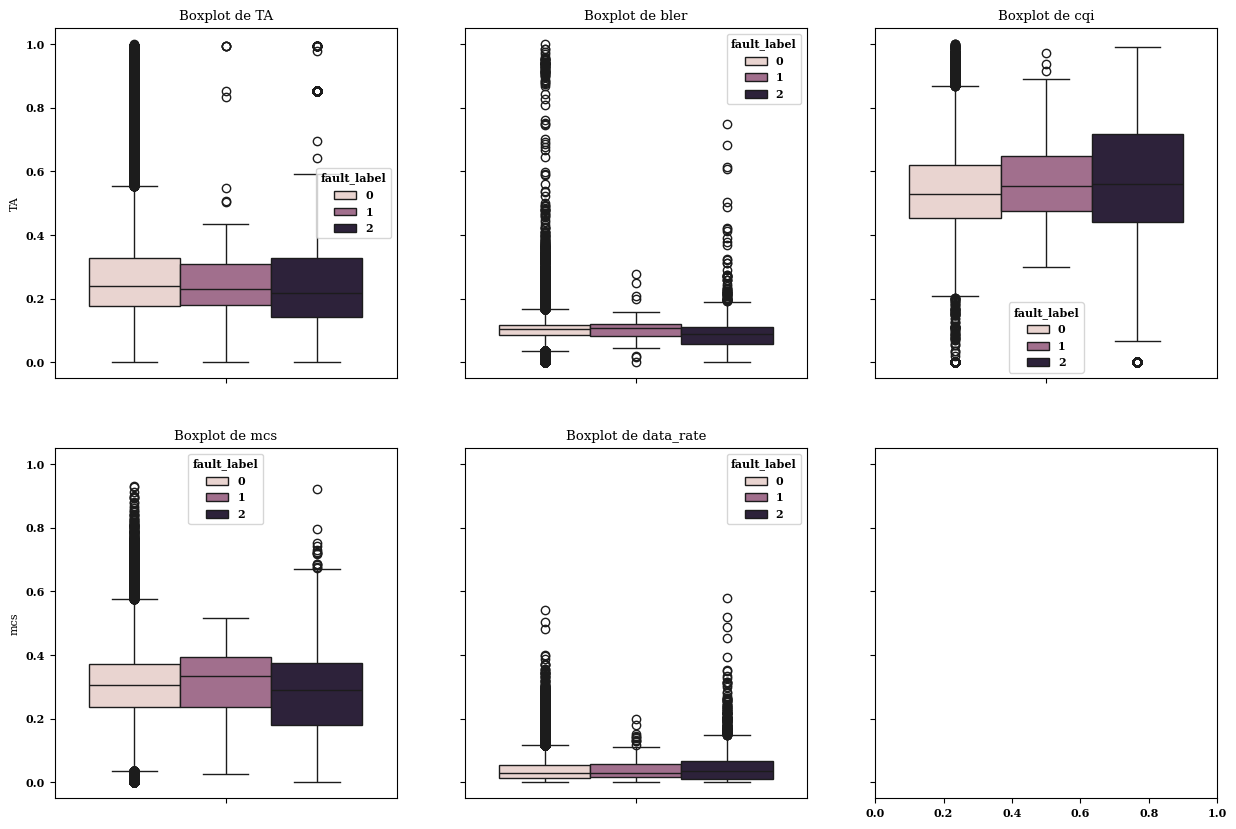

In [53]:
boxplots(df_scaled.sample(frac=0.2), "fault_label")

## **INDIVIDUAL MODELS**

In [110]:
print(f"Length of total data: {len(X_res)}")
print(f"Length of training data: {len(X_train_res)}")
print(f"Length of test data: {len(X_test_res)}")

Length of total data: 7273215
Length of training data: 439625
Length of test data: 109907


### imports

In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import time

#### help functions

In [56]:
def execute(model, data):
  start = time.time()
  pred = model.predict(data)
  end = time.time()
  t = end - start
  inf_t = t/len(data)

  print("time elapsed: " + "{:.4f}".format(t) + " seconds")
  print("mean inference time: "+ str(inf_t) + " seconds")
  return pred

In [57]:
def show_results(y_test, predictions):
  print('Accuracy score:', accuracy_score(y_test, predictions))

  print(f'print: {precision_score(y_test, predictions)}')

  fig, axes = plt.subplots(1, 2, figsize=(15, 5))

  font = {'family' : 'serif', 'weight' : 'bold', 'size':18}
  plt.rc('font', **font)
  disp = ConfusionMatrixDisplay(confusion_matrix(y_test, predictions), display_labels=None)
  disp.plot(ax=axes[0])

  class_names = ['No-Fault', 'Short Fault', 'Long Fault']
  metrics_names = ['F1', 'Recall']
  metrics_df = pd.DataFrame(index=class_names,  columns = metrics_names)
  metrics_df['F1'] = f1_score(y_test, predictions, average=None)
  metrics_df['Recall'] = recall_score(y_test, predictions, average=None)

  metrics_df = metrics_df.transpose()
  sn.heatmap(metrics_df,annot=True, cmap=sn.cubehelix_palette(as_cmap=True), ax=axes[1])

  plt.show()

In [58]:
import pickle
from joblib import dump, load

%cd '/home/usr/Documents/dataset/models'

[Errno 2] No such file or directory: '/home/usr/Documents/dataset/models'
/home/usr/Documents/reg-class-fault-detection/dataset/train_test_dataset_Fault Impact Analysis


/home/usr/anaconda3/envs/fault_pred/lib/python3.11/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


## cLASSIFICATION MODELS

### XGBoost Model

In [111]:
xgb_classifier = xgb.XGBClassifier(eta = 0.1, n_estimators=500, max_depth=20)
xgb_classifier = xgb_classifier.fit(X_train_res, y_train_res)

xgb_pred = execute(xgb_classifier, X_test_res)


: 

Accuracy score: 0.9355153479756549


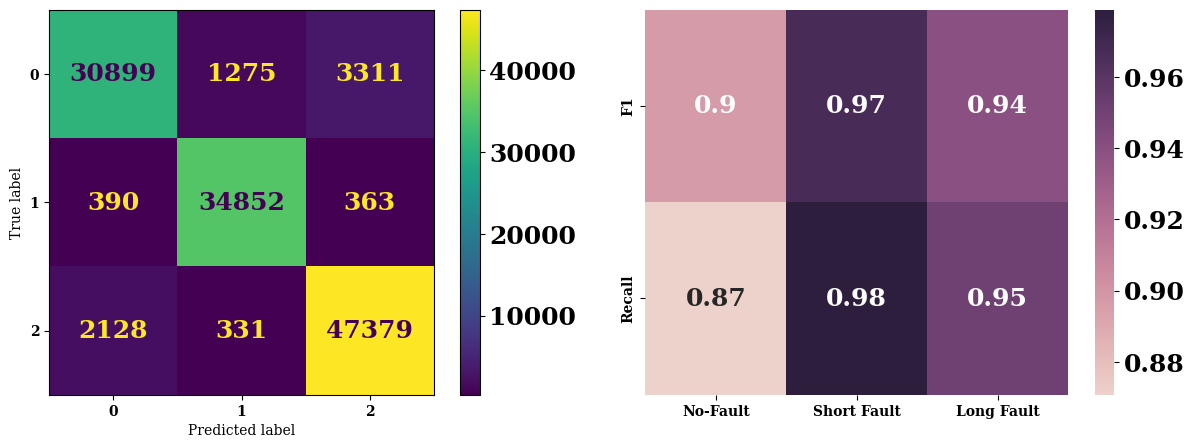

In [ ]:
show_results(y_test_res, xgb_pred)

####GRIDSEARCH

In [56]:
# from sklearn.model_selection import GridSearchCV

# parameters = {'n_estimators':(200, 350, 500), 'max_depth':(3,7,12,20), 'eta':(0.01, 0.1, 0.3)}

# xgb_grid = GridSearchCV(xgb_classifier, parameters, scoring='accuracy')
# xgb_grid.fit(X_train_res, y_train_res)
# xgbest = xgb_grid.best_estimator_
# preds = xgbest.predict(X_test_res)
# show_results(y_test_res, preds)


### KNN

time elapsed: 17.1877 seconds
mean inference time: 0.00014213130339392596 seconds
Accuracy score: 0.8958884625562318


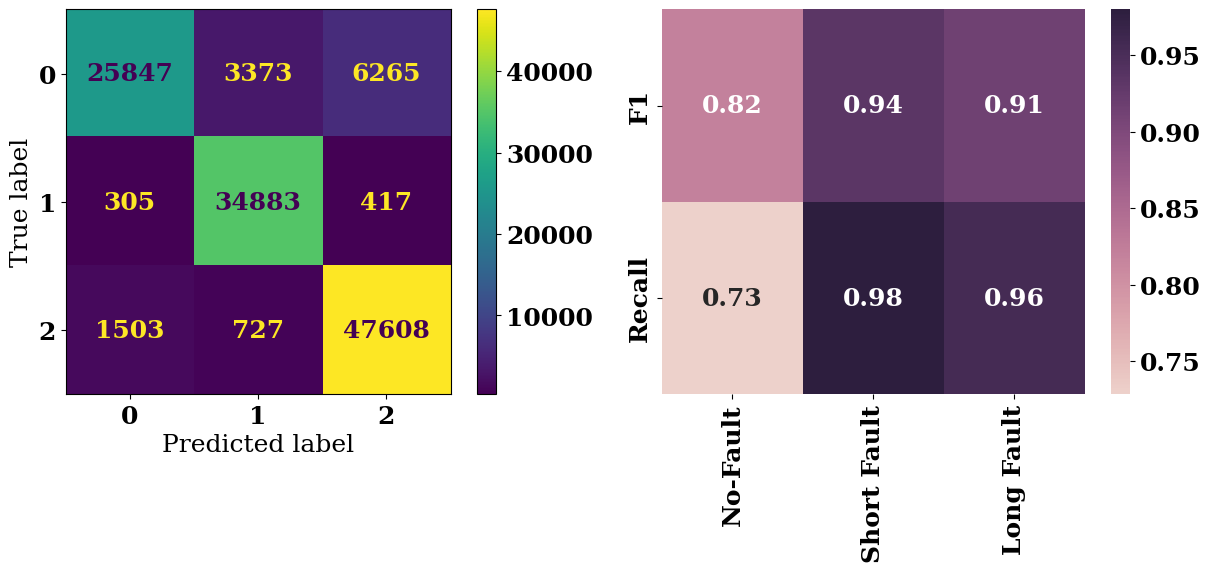

In [57]:
knearest = KNeighborsClassifier(n_neighbors =1)
knearest = knearest.fit(X_train_res, y_train_res)
knn_pred = execute(knearest, X_test_res)
show_results(y_test_res, knn_pred)

In [58]:

# param_grid =  {'n_neighbors': [1, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15,20, 24, 28, 30]}

# knn_grid = GridSearchCV(knearest, param_grid, cv=10, scoring='accuracy', return_train_score=False, n_jobs=-1)
# knn_grid.fit(X_train_res, y_train_res)
# knn_best = knn_grid.best_estimator_
# preds = knn_best.predict(X_test_res)
# show_results(y_test_res, preds)

In [59]:
# knn_best

### CATBOOST

In [64]:
X_test_res2, X_val, y_test_res2,y_val = train_test_split(X_test_res, y_test_res, train_size=0.5)

0:	learn: 1.0839807	total: 148ms	remaining: 2m 28s
50:	learn: 0.9417832	total: 5.19s	remaining: 1m 36s
100:	learn: 0.9016732	total: 10.2s	remaining: 1m 31s
150:	learn: 0.8739990	total: 15.1s	remaining: 1m 25s
200:	learn: 0.8526721	total: 20.3s	remaining: 1m 20s
250:	learn: 0.8346863	total: 25.3s	remaining: 1m 15s
300:	learn: 0.8191927	total: 30.5s	remaining: 1m 10s
350:	learn: 0.8059866	total: 35.6s	remaining: 1m 5s
400:	learn: 0.7948344	total: 40.7s	remaining: 1m
450:	learn: 0.7845309	total: 45.8s	remaining: 55.7s
500:	learn: 0.7738676	total: 50.9s	remaining: 50.7s
550:	learn: 0.7645476	total: 56s	remaining: 45.6s
600:	learn: 0.7559617	total: 1m 1s	remaining: 40.7s
650:	learn: 0.7478573	total: 1m 6s	remaining: 35.6s
700:	learn: 0.7403386	total: 1m 11s	remaining: 30.6s
750:	learn: 0.7333658	total: 1m 16s	remaining: 25.5s
800:	learn: 0.7265576	total: 1m 21s	remaining: 20.3s
850:	learn: 0.7203863	total: 1m 26s	remaining: 15.2s
900:	learn: 0.7138893	total: 1m 31s	remaining: 10.1s
950:	lea

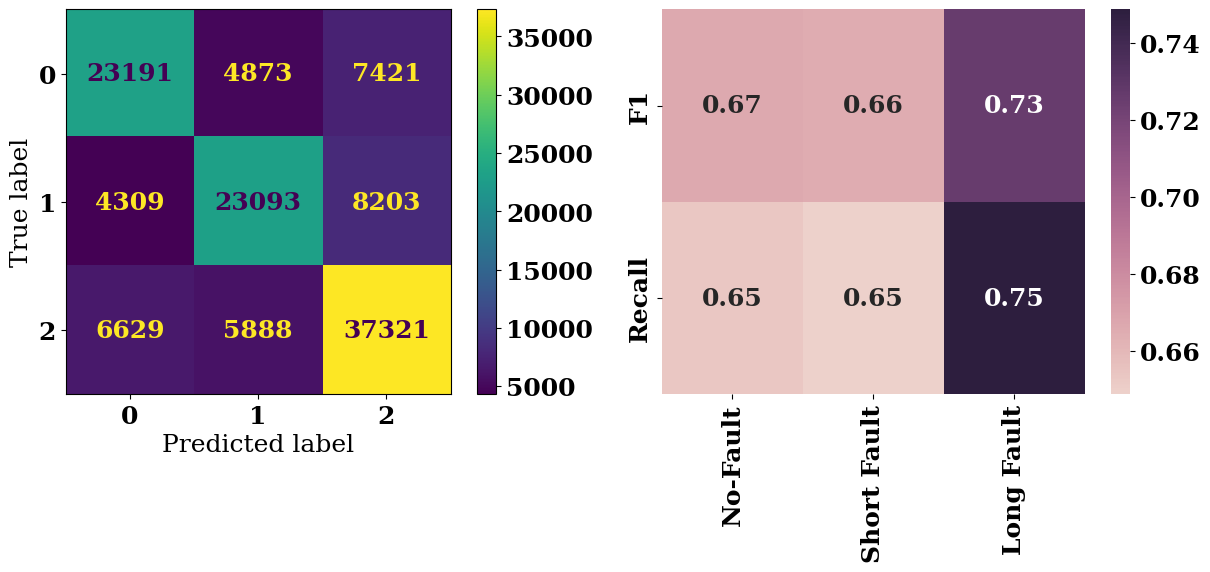

In [65]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(
    iterations=1000,
    verbose=50,
    learning_rate=0.1,
    loss_function='MultiClass'
)
CatBoostClassifier()
cat.fit(
    X_train_res, y_train_res,
)

cat_pred = execute(cat, X_test_res)
show_results(y_test_res, cat_pred)


## LOAD

In [58]:
voting = load("voting.joblib")

: 

In [44]:
XGBmodel1 = load('xgb_regressor_short.joblib')
XGBmodel2 = load('xgb_regressor_long.joblib')

## ENSEMBLE LEARNING: LOGISTIC REGRESSION + KNN + XGBOOST

#### SOFT APPROACH

0:	learn: 1.0839436	total: 88.9ms	remaining: 1m 28s
50:	learn: 0.9410142	total: 5.19s	remaining: 1m 36s
100:	learn: 0.9009488	total: 10.7s	remaining: 1m 35s
150:	learn: 0.8734789	total: 15.8s	remaining: 1m 28s
200:	learn: 0.8518234	total: 20.6s	remaining: 1m 21s
250:	learn: 0.8351976	total: 25.4s	remaining: 1m 15s
300:	learn: 0.8198083	total: 30s	remaining: 1m 9s
350:	learn: 0.8066841	total: 34.9s	remaining: 1m 4s
400:	learn: 0.7947407	total: 39.7s	remaining: 59.4s
450:	learn: 0.7834872	total: 44.8s	remaining: 54.5s
500:	learn: 0.7734952	total: 49.9s	remaining: 49.7s
550:	learn: 0.7643432	total: 55.4s	remaining: 45.1s
600:	learn: 0.7556179	total: 1m	remaining: 40.4s
650:	learn: 0.7469879	total: 1m 5s	remaining: 35.2s
700:	learn: 0.7396027	total: 1m 10s	remaining: 30s
750:	learn: 0.7324842	total: 1m 15s	remaining: 24.9s
800:	learn: 0.7259152	total: 1m 20s	remaining: 19.9s
850:	learn: 0.7193613	total: 1m 25s	remaining: 14.9s
900:	learn: 0.7133536	total: 1m 30s	remaining: 9.94s
950:	learn

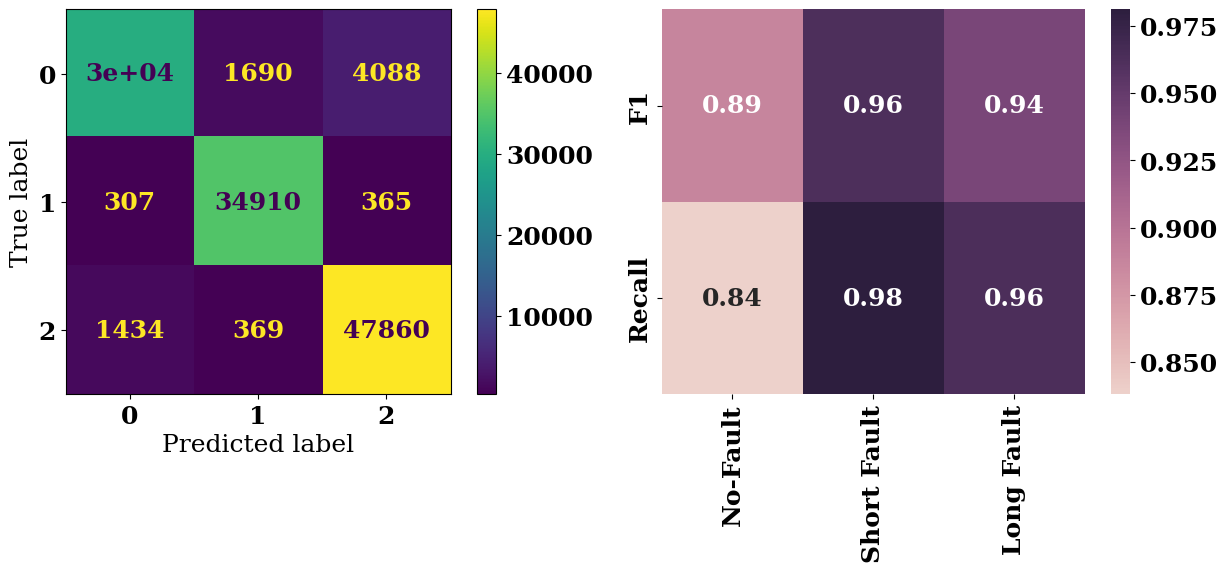

In [66]:
voting = VotingClassifier(estimators = [('cat', cat), ('KNN', knearest),('xgb', xgb_classifier)], voting = 'soft',weights=[0.2,0.35,0.45])
voting.fit(X_train_res, y_train_res)
predicted = execute(voting, X_test_res)
show_results(y_test_res, predicted)


In [55]:
voting = load("voting.joblib")

#### HARD APPROACH

In [66]:
voting_hard = VotingClassifier(estimators = [('cat', cat), ('KNN', knearest),('xgb', xgb_classifier)], voting = 'hard')
voting_hard.fit(X_train_res, y_train_res)


0:	learn: 1.0839807	total: 96.2ms	remaining: 1m 36s
50:	learn: 0.9417832	total: 4.84s	remaining: 1m 30s
100:	learn: 0.9016732	total: 9.78s	remaining: 1m 27s
150:	learn: 0.8739990	total: 14.4s	remaining: 1m 21s
200:	learn: 0.8526721	total: 19.1s	remaining: 1m 16s
250:	learn: 0.8346863	total: 23.8s	remaining: 1m 11s
300:	learn: 0.8191927	total: 28.6s	remaining: 1m 6s
350:	learn: 0.8059866	total: 33.4s	remaining: 1m 1s
400:	learn: 0.7948344	total: 38s	remaining: 56.8s
450:	learn: 0.7845309	total: 42.8s	remaining: 52.1s
500:	learn: 0.7738676	total: 47.6s	remaining: 47.5s
550:	learn: 0.7645476	total: 52.4s	remaining: 42.7s
600:	learn: 0.7559617	total: 57.2s	remaining: 38s
650:	learn: 0.7478573	total: 1m 1s	remaining: 33.2s
700:	learn: 0.7403386	total: 1m 6s	remaining: 28.5s
750:	learn: 0.7333658	total: 1m 11s	remaining: 23.8s
800:	learn: 0.7265576	total: 1m 16s	remaining: 19s
850:	learn: 0.7203863	total: 1m 21s	remaining: 14.2s
900:	learn: 0.7138893	total: 1m 26s	remaining: 9.46s
950:	learn

VotingClassifier(estimators=[('cat',
                              <catboost.core.CatBoostClassifier object at 0x7c003d62db90>),
                             ('KNN', KNeighborsClassifier(n_neighbors=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False, eta=0.1,
                                            eval_met...
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=20,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None, ...))])

In [69]:
dump(voting_hard, "hard_voting.joblib")

#o código tá crashando na hora de salvar

: 

In [ ]:
voting_hard = load("hard_voting.joblib")
#o código tb tá crashando na hora de carregar

In [ ]:
predicted_hard = execute(voting_hard, X_test_res)
show_results(y_test_res, predicted_hard)

time elapsed: 0.0032 seconds
mean inference time: 5.116343439617029e-08 seconds
Accuracy score: 0.4522831448555885


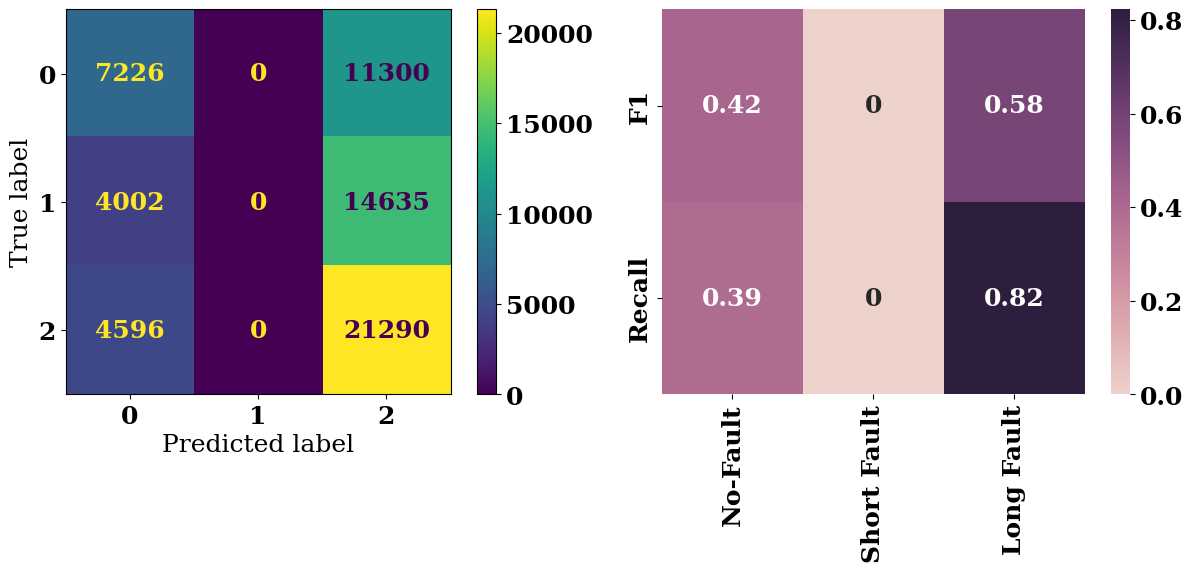

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# tr = DecisionTreeClassifier(max_depth=3)
# tr = tr.fit(X_train_res, y_train_res)
# tree_pred = execute(tr, X_test_res)
# show_results(y_test_res, tree_pred)

## **REGRESSION FOR EACH CLASS**

testar o pca nessa seção de código

In [56]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [57]:
def mbe_error(test_labels, test_predictions):
    return np.mean(test_predictions - test_labels)

In [58]:
def underToOverRatio(test_labels, test_predictions):

    under = []
    over = []
    for pair in zip(test_labels, test_predictions):
        if(pair[0] > pair[1]):
            under.append(pair)
        else:
            over.append(pair)
        
    under_mae = (np.sum([np.abs(p[1] - p[0]) for p in under]))/len(under)
    over_mae = (np.sum([np.abs(p[1] - p[0]) for p in over]))/len(over)

    print(f"under mae: {under_mae}")
    print(f"over mae: {over_mae}")
    return (under_mae/over_mae)

In [61]:
def reg_acc(md, data, test_labels):
  test_predictions = md.predict(data).flatten()
  r2 = r2_score(test_labels, test_predictions)
  rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))
  mbe = mbe_error(test_labels, test_predictions)
  utor = underToOverRatio(test_labels, test_predictions)
  mae = mean_absolute_error(test_labels, test_predictions)

  print(f'r2 score: {r2}')
  print(f'rmse score: {rmse}')
  print(f'mbe score: {mbe}')
  print(f'utor score: {utor}')
  print(f'mae score: {mae}')
  # print(f'erro medio de: {rmse} segundos')

  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0,plt.xlim()[1]])
  plt.ylim([0,plt.ylim()[1]])
  _ = plt.plot([-100, 100], [-100, 100])

In [62]:
df_reg = pd.DataFrame()

df_reg[['access_success_rate', 'resource_utilition_rate', 'TA', 'bler', 'cqi','mcs', 'data_rate','fault_duration']] = X_test_fd


In [63]:
df_reg_0 = df_reg[df_reg['fault_duration'] == 0]
df_reg_1 = df_reg[(df_reg['fault_duration'] < 500) &( df_reg['fault_duration'] != 0 )]
df_reg_2 = df_reg[df_reg['fault_duration'] > 500]

In [64]:
def train_test_split_reg(df):
  X = df[['access_success_rate', 'resource_utilition_rate', 'TA', 'bler', 'cqi','mcs', 'data_rate']].values
  y = df['fault_duration']

  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=15)

  return X_train, X_test, y_train, y_test

In [65]:
def print_stats(stats):
    i= 0
    for fold in stats:
        print(f'fold {i}: ')
        print(f'rmse:{fold[0]} ')
        print(f'mae:{fold[1]} ')
        print(f'utor:{fold[2]} ')
    i += 1

In [66]:
from sklearn.model_selection import KFold
def kfold(model, df):

    X = df[['access_success_rate', 'resource_utilition_rate', 'TA', 'bler', 'cqi','mcs', 'data_rate']].values
    y = df['fault_duration'].values

    kf = KFold(n_splits=5, shuffle=True)
    X_train, X_test, y_train, y_test = train_test_split_reg(df)
    stats = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        stats.append([ np.sqrt(mean_squared_error(y_test, y_pred)), mean_absolute_error(y_test, y_pred), underToOverRatio(y_test, y_pred)])

    print_stats(stats)

In [67]:
X_train_reg1, X_test_reg1, y_train_reg1, y_test_reg1 = train_test_split_reg(df_reg_1)
X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2 = train_test_split_reg(df_reg_2)

In [82]:
XGBmodel1 = load('xgb_regressor_short.joblib')

In [ ]:
XGBmodel1 = XGBRegressor(eta = 0.1, n_estimators=500, max_depth=20)
XGBmodel1 = XGBmodel1.fit(X_train_reg1, y_train_reg1)

under mae: 35.759869431926234
over mae: 29.809394776216475
r2 score: 0.7434890123306408
rmse score: 64.14373506336162
mbe score: 0.21096143948263896
utor score: 1.1996174259954235
mae score: 32.495481459450566


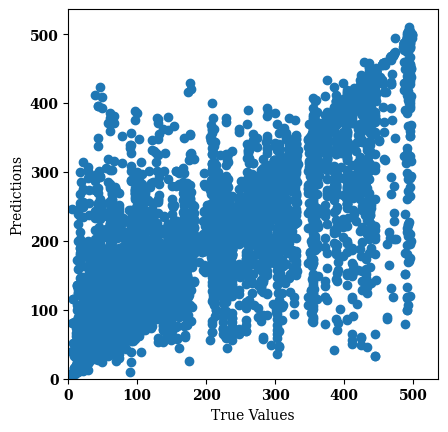

In [71]:
reg_acc(XGBmodel1, X_test_reg1, y_test_reg1)

In [82]:
kfold(XGBmodel1, df_reg_1)

under mae: 33.328427235161435
over mae: 27.662946352822935
under mae: 31.883840992029462
over mae: 28.263209242624423
under mae: 33.41260380844233
over mae: 26.699845494402574
under mae: 31.25874793254789
over mae: 25.903183635427578
under mae: 33.7719463493587
over mae: 27.674236711076038
fold 0: 
rmse:59.196082691195215 
mae:30.210698836283445 
utor:1.2048039572531055 
fold 0: 
rmse:58.82832523750829 
mae:29.916361068545257 
utor:1.1281040563484446 
fold 0: 
rmse:58.28125551113346 
mae:29.76861596890872 
utor:1.2514156239386116 
fold 0: 
rmse:57.704388913822456 
mae:28.43701520971951 
utor:1.2067531301363108 
fold 0: 
rmse:58.745893239312295 
mae:30.46651748267353 
utor:1.220338855302274 


In [50]:
# from joblib import load, dump

# %cd '/home/usr/Documents/dataset/models'
# dump(XGBmodel1, 'xgb_regressor_short.joblib')

/home/usr/anaconda3/envs/fault_pred/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/usr/Documents/dataset/models


['xgb_regressor_short.joblib']

In [48]:
# save(XGBmodel1, 'xgb_regressor_short')

'xgb_regressor_short)' was not found in history, as a file, url, nor in the user namespace.


In [ ]:
from catboost import CatBoostRegressor

X_train_reg1_2, X_val_reg, y_train_reg1_2, y_val_reg = train_test_split(X_train_reg1, y_train_reg1, test_size=0.5)

cat_reg = CatBoostRegressor(
    iterations=1e4,
    verbose=0,
    learning_rate=0.1,
    loss_function='RMSE'
)

cat_reg.fit(
    X_train_reg1, y_train_reg1,
    eval_set=(X_val_reg, y_val_reg),
)


In [72]:
cat_reg = load('cat_reg_short.joblib')

under mae: 43.64510022358661
over mae: 38.89907511826396
r2 score: 0.7582492640029384
rmse score: 62.270902657026234
mbe score: -0.026775673807601107
utor score: 1.1220086876331485
mae score: 41.137186582096696


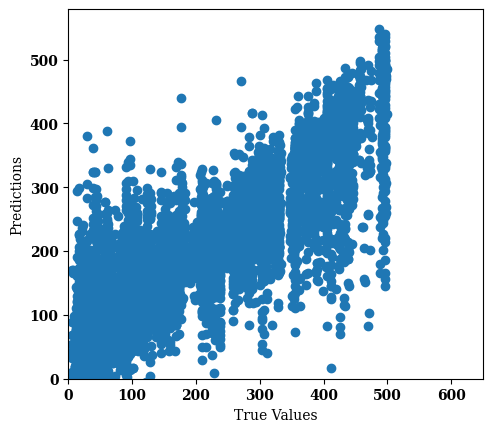

In [73]:
reg_acc(cat_reg, X_test_reg1, y_test_reg1)

In [83]:
kfold(cat_reg, df_reg_1)

0:	learn: 126.7043272	total: 3.9ms	remaining: 39s
1000:	learn: 67.2242132	total: 2.6s	remaining: 23.4s
2000:	learn: 54.1091687	total: 5.23s	remaining: 20.9s
3000:	learn: 45.9306882	total: 7.79s	remaining: 18.2s
4000:	learn: 40.1134988	total: 10.4s	remaining: 15.6s
5000:	learn: 35.5359682	total: 13.1s	remaining: 13.1s
6000:	learn: 31.8442557	total: 15.7s	remaining: 10.4s
7000:	learn: 28.8038547	total: 18.3s	remaining: 7.82s
8000:	learn: 26.2066728	total: 20.9s	remaining: 5.23s
9000:	learn: 23.9163716	total: 23.5s	remaining: 2.61s
9999:	learn: 21.8803327	total: 26.1s	remaining: 0us
under mae: 40.171601241060735
over mae: 37.58296624887982
0:	learn: 126.6751218	total: 3.88ms	remaining: 38.8s
1000:	learn: 66.9944868	total: 2.6s	remaining: 23.4s
2000:	learn: 53.9885656	total: 5.16s	remaining: 20.6s
3000:	learn: 45.9922462	total: 7.78s	remaining: 18.1s
4000:	learn: 40.2732320	total: 10.3s	remaining: 15.5s
5000:	learn: 35.8053150	total: 12.9s	remaining: 12.9s
6000:	learn: 32.2098715	total: 15

In [55]:
# dump(cat_reg, 'cat_reg_short.joblib')

['cat_reg_short.joblib']

In [74]:
np.mean(y_test_reg1)

169.20229978058336

### long fault

In [72]:
XGBmodel2 = XGBRegressor(eta = 0.1, n_estimators=500, max_depth=20)
XGBmodel2 = XGBmodel2.fit(X_train_reg2, y_train_reg2)


In [70]:
XGBmodel2 = load('xgb_regressor_long.joblib')

under mae: 385.7209126172454
over mae: 418.47114023556236
r2 score: 0.6089138230530116
rmse score: 619.8165232873963
mbe score: 4.660441550402529
utor score: 0.921738384157432
mae score: 401.61895359089493


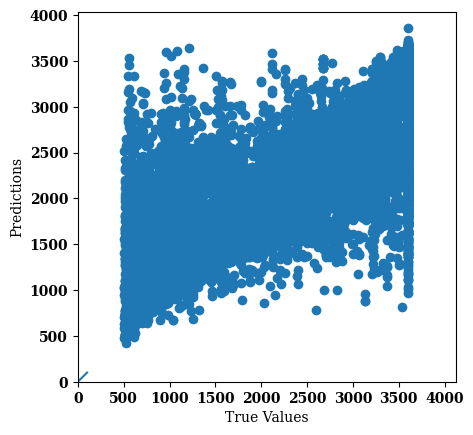

In [76]:
reg_acc(XGBmodel2, X_test_reg2, y_test_reg2)

In [84]:
kfold(XGBmodel2, df_reg_2)

under mae: 387.6740352819903
over mae: 405.0302619937883
under mae: 370.79632308658637
over mae: 407.0324197143944
under mae: 372.83983340957246
over mae: 392.4223991115337
under mae: 359.27888765506344
over mae: 399.8361849084456
under mae: 367.0813353655029
over mae: 396.35716918480824
fold 0: 
rmse:617.4116611784776 
mae:396.1202440615713 
utor:0.9571483211492375 
fold 0: 
rmse:619.282947950093 
mae:388.6668272402843 
utor:0.9109749128749153 
fold 0: 
rmse:600.2838478225652 
mae:382.4845372246045 
utor:0.9500982468220538 
fold 0: 
rmse:598.2977251185102 
mae:378.74867227042165 
utor:0.8985652154952685 
fold 0: 
rmse:601.3758236879092 
mae:380.94419126727985 
utor:0.92613774621633 


In [78]:
from catboost import CatBoostRegressor

X_train_reg2_2, X_val2_reg, y_train_reg2_2, y_val2_reg = train_test_split(X_train_reg2, y_train_reg2, test_size=0.5)

cat_reg2 = CatBoostRegressor(
    iterations=2e4,
    verbose=1000,
    learning_rate=0.1,
    loss_function='RMSE'
)

cat_reg2.fit(
    X_train_reg2, y_train_reg2,
    eval_set=(X_val2_reg, y_val2_reg),
)


0:	learn: 979.3244568	test: 982.8060624	best: 982.8060624 (0)	total: 58.1ms	remaining: 19m 21s
1000:	learn: 672.4296253	test: 674.6818002	best: 674.6818002 (1000)	total: 3.26s	remaining: 1m 1s
2000:	learn: 585.1402387	test: 587.3409359	best: 587.3409359 (2000)	total: 6.38s	remaining: 57.4s
3000:	learn: 524.7789020	test: 527.7885190	best: 527.7885190 (3000)	total: 9.47s	remaining: 53.6s
4000:	learn: 480.0508592	test: 483.0202139	best: 483.0202139 (4000)	total: 12.6s	remaining: 50.4s
5000:	learn: 443.3024761	test: 445.7400044	best: 445.7400044 (5000)	total: 15.7s	remaining: 47s
6000:	learn: 412.6617417	test: 414.9390949	best: 414.9390949 (6000)	total: 18.7s	remaining: 43.7s
7000:	learn: 385.5813684	test: 387.6407680	best: 387.6407680 (7000)	total: 21.8s	remaining: 40.5s
8000:	learn: 362.1981298	test: 363.8753719	best: 363.8753719 (8000)	total: 25s	remaining: 37.4s
9000:	learn: 341.7233650	test: 343.2412380	best: 343.2412380 (9000)	total: 28s	remaining: 34.3s
10000:	learn: 323.9188611	tes

under mae: 461.8203117811944
over mae: 488.41936145775344
r2 score: 0.5650570883352171
rmse score: 653.6466585274881
mbe score: -2.260960066075323
utor score: 0.9455405502411481
mae score: 474.68426849637984


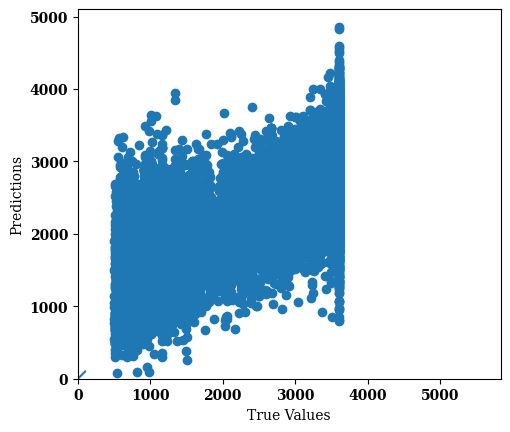

In [79]:
reg_acc(cat_reg2, X_test_reg2, y_test_reg2)

In [85]:
kfold(cat_reg2, df_reg_2)

0:	learn: 981.4042457	total: 3.84ms	remaining: 1m 16s


1000:	learn: 679.1307616	total: 3s	remaining: 57.1s
2000:	learn: 597.0298040	total: 6.06s	remaining: 54.5s
3000:	learn: 541.0842136	total: 9.11s	remaining: 51.6s
4000:	learn: 495.7996797	total: 12.1s	remaining: 48.4s
5000:	learn: 459.2373336	total: 15.1s	remaining: 45.4s
6000:	learn: 429.3742506	total: 18.2s	remaining: 42.4s
7000:	learn: 402.8613439	total: 21.2s	remaining: 39.3s
8000:	learn: 379.7470361	total: 24.3s	remaining: 36.4s
9000:	learn: 359.7107727	total: 27.3s	remaining: 33.3s
10000:	learn: 342.0652530	total: 30.3s	remaining: 30.3s
11000:	learn: 326.3689731	total: 33.2s	remaining: 27.2s
12000:	learn: 311.9208280	total: 36.2s	remaining: 24.2s
13000:	learn: 299.0673785	total: 39.2s	remaining: 21.1s
14000:	learn: 287.1854123	total: 42.2s	remaining: 18.1s
15000:	learn: 276.5235920	total: 45.2s	remaining: 15.1s
16000:	learn: 266.8375985	total: 48.2s	remaining: 12s
17000:	learn: 257.6911463	total: 51.2s	remaining: 9.03s
18000:	learn: 249.6438404	total: 54.1s	remaining: 6.01s
19000:

In [80]:
dump(cat_reg, 'cat_reg_long.joblib')

['cat_reg_long.joblib']

In [81]:
np.mean(y_test_reg2)

2221.147441941852

usar um K-fold pra documentar os resultados

## **TESTING FOR UNBALANCED DATA**


Como será a performance em dados desbalanceados ? Que é o que se espera de uma rede em seu estado normal.

#### data treatment

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
X_train_unb, X_test_unb, y_train_unb, y_test_unb = train_test_split(X_std, df_main['fault_label'] , test_size=0.2, random_state=21)

#### Voting- Unbalanced

time elapsed: 13.5199 seconds
mean inference time: 0.0001462548998579544 seconds
Accuracy score: 0.8867818392271828


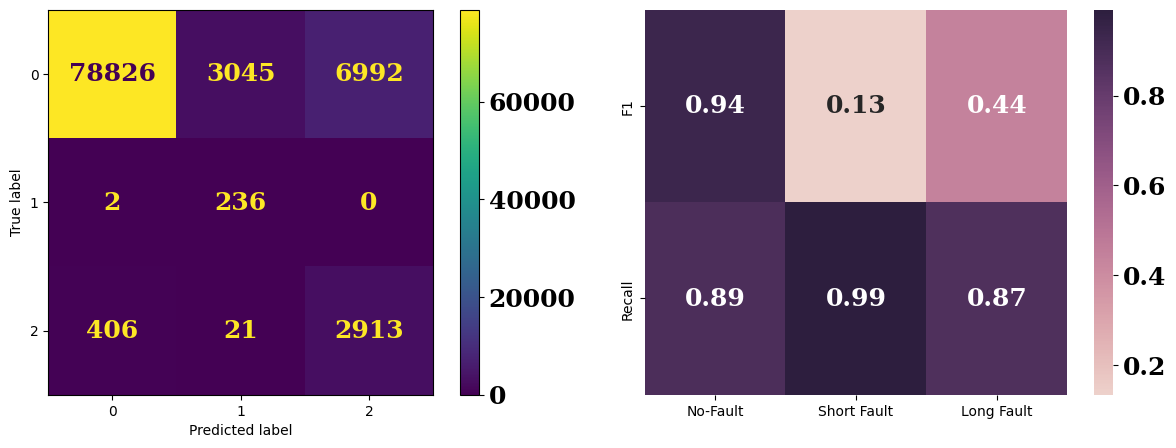

In [73]:
predicted2 = execute(voting, X_test_unb)
show_results(y_test_unb, predicted2)


#### KNN - Unbalanced (tá antigo, n foi rodado novamente, e provavelmente n vai ser usado na análise.)

(tá antigo)

time elapsed: 2.0916 seconds
mean inference time: 9.898615853796623e-05 seconds
Accuracy score: 0.9252721249408424


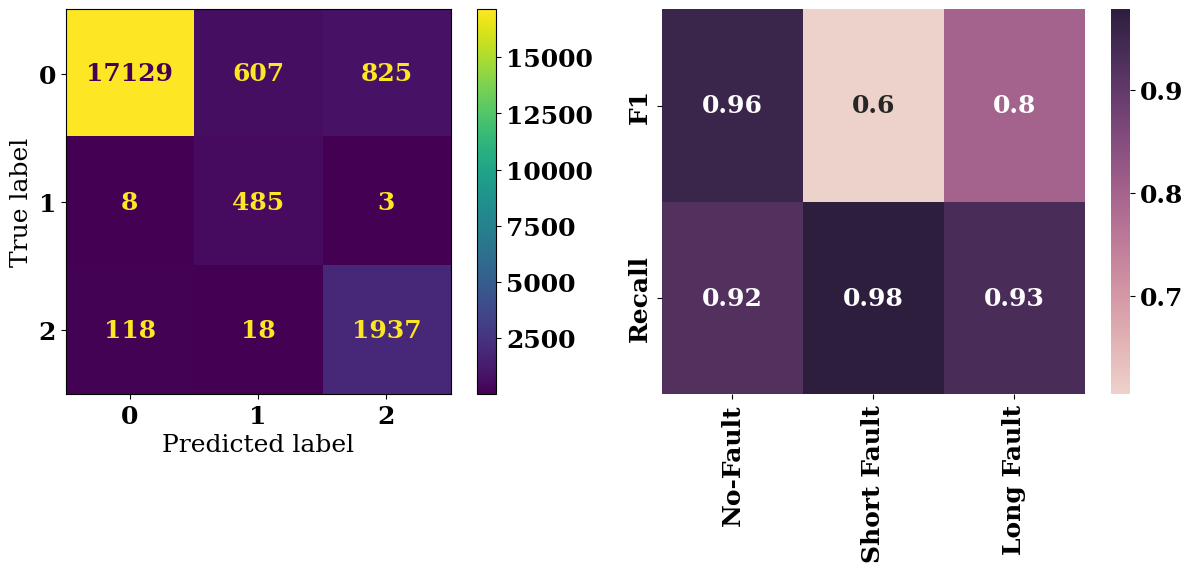

In [ ]:
knn_pred_unb = execute(knearest, X_test_unb)
show_results(y_test_unb, knn_pred_unb)

XGB Unbalanced

time elapsed: 1.2605 seconds
mean inference time: 5.965365993429347e-05 seconds
Accuracy score: 0.9368670137245623


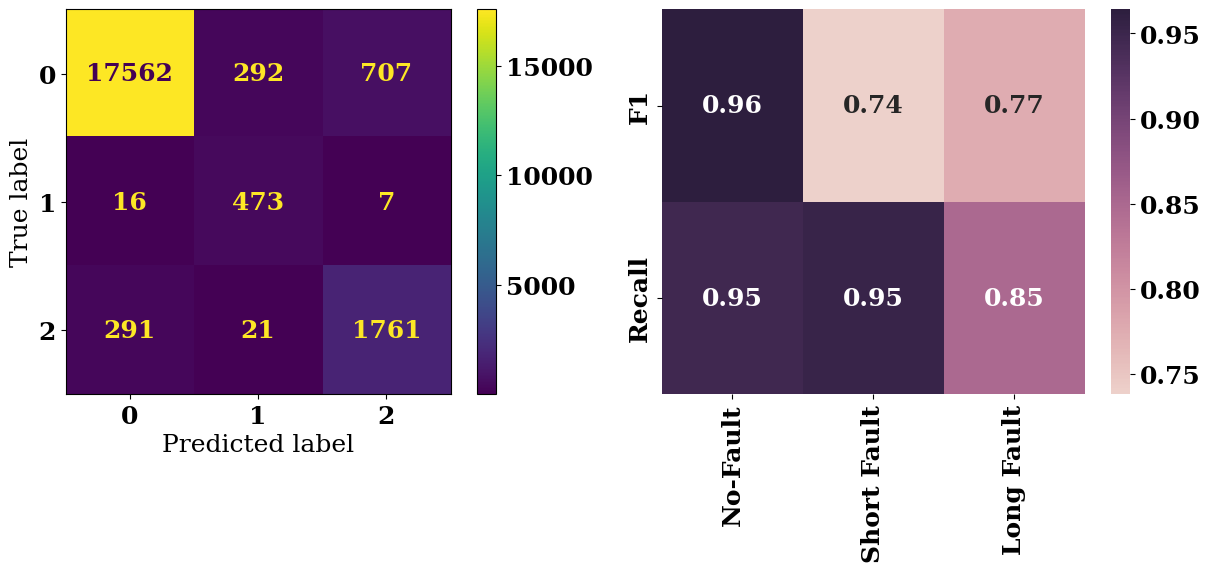

In [ ]:
xgb_pred_unb = execute(xgb_classifier, X_test_unb)
show_results(y_test_unb, xgb_pred_unb)

##### **UMAP PLOT**

In [ ]:
# !pip install umap-learn
# !pip install datashader
# !pip install bokeh
# !pip install holoviews

In [1]:
# import umap
# import umap.plot

In [ ]:
cluster_labels = knearest.predict(X_test_unb)

In [ ]:
cluster_df = pd.DataFrame()
cluster_df [['access_success_rate', 'resource_utilition_rate', 'TA', 'bler', 'cqi',
       'mcs', 'data_rate']] = X_test_unb

cluster_df['labels'] = cluster_labels

In [ ]:
mapper = umap.UMAP().fit(cluster_df)

<Axes: >

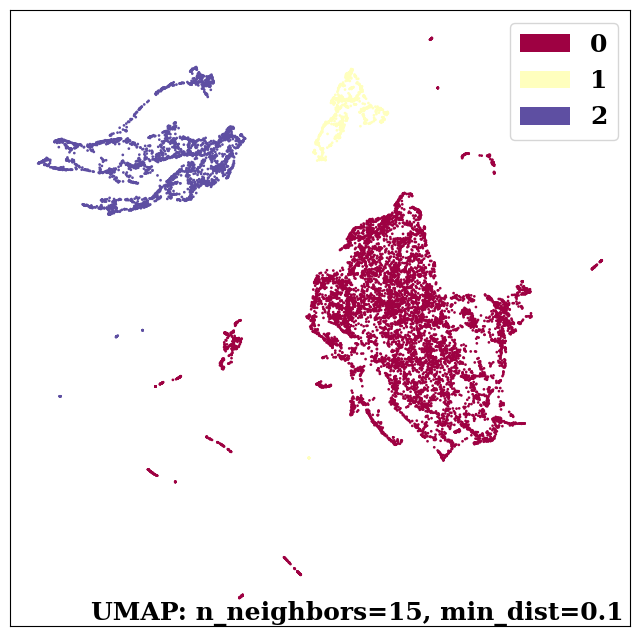

: 

: 

: 

: 

In [ ]:
umap.plot.points(mapper, labels=cluster_labels)

Pode-se considerar a performance no modelo como muito boa, levando em conta que no problema em questão é importante a gente minimizar a ocorrência de falsos negativos.

O recall é possivelmente a métrica mais importante nesse caso, já que leva em conta:

        tp / (tp + fn)
OU SEJA

        falhas/(falhas + falhas não detectadas)

## **PIPELINE TESTING**

In [57]:
df_pipeline = pd.DataFrame()

In [58]:
df_pipeline[['access_success_rate', 'resource_utilition_rate', 'TA', 'bler', 'cqi',
       'mcs', 'data_rate','fault_duration']] = X_test_fd

In [59]:
label_pred = voting.predict(X_test_res)
df_pipeline['predicted_label'] = label_pred
df_pipeline['predicted_duration'] = [0] * len(df_pipeline)

In [60]:
def pred_func1(c1,c2,c3,c4,c5,c6,c7,c8):
    data = np.array([c1,c2,c3,c4,c5,c6,c7]).reshape(1, -1)
    return XGBmodel1.predict(data)

In [61]:
def pred_func2(c1,c2,c3,c4,c5,c6,c7,c8):

    data = np.array([c1,c2,c3,c4,c5,c6,c7]).reshape(1, -1)
    return XGBmodel2.predict(data)

In [62]:
predicted_duration = df_pipeline[['access_success_rate', 'resource_utilition_rate',
                    'TA', 'bler', 'cqi','mcs', 'data_rate',
                    'predicted_label']].apply(lambda x: 
                                            pred_func1(x.access_success_rate, x.resource_utilition_rate, x.TA,
                                            x.bler, x.cqi, x.mcs, x.data_rate, x.predicted_label)
                                            if x.predicted_label == 1
                                            else
                                            pred_func2(x.access_success_rate, x.resource_utilition_rate, x.TA,
                                            x.bler, x.cqi, x.mcs, x.data_rate, x.predicted_label), 
                                        axis=1)

In [63]:
predicted_duration = [p[0] for p in predicted_duration]
df_pipeline['predicted_duration'] = predicted_duration

In [87]:
def monitor(duration, predicted):
    if(duration <= predicted):
        return (-duration)
    elif(duration >= 500 and predicted >= 500):
        return (-duration)
    else:
        return duration
    

def monitorFunc(df, pred):
    tpl = zip(df['fault_duration'], pred)
    monitor_array = [monitor(t[0], t[1]) for t in tpl]
    time_balance = np.sum(monitor_array)//3600

    return time_balance

In [85]:
def noActionTaken(duration, predicted):
    if((duration < 500) and (predicted < 500)):
        return duration
    else:
        return 0
    
def noActionFunc(df, pred):
    tpl = zip(df['fault_duration'], pred)
    noAction_array = [noActionTaken(t[0], t[1]) for t in tpl]
    noAction = np.sum(noAction_array)//3600

    return noAction


In [91]:
def faults(duration, predicted):
    if((duration >= 500) and (predicted < 500)):
        return duration
    else:
        return 0
    
def faultsFunc(df, pred):
    tpl = zip(df['fault_duration'], pred)
    untreated_faults = [faults(t[0], t[1]) for t in tpl]
    untreated_time = np.sum(untreated_faults)//3600

    return untreated_time

In [92]:
def overCaution(duration, predicted):
    if((duration < 500) and (predicted > 500)):
        return (predicted - duration)
    elif((duration > 500) and (predicted > duration)):
        return (predicted - duration)
    else:
        return 0
    
def overCautionFunc(df, pred):
    tpl = zip(df['fault_duration'], pred)
    caution = [overCaution(t[0], t[1]) for t in tpl]
    caution_time = np.sum(caution)//3600


    return caution_time


In [94]:
def underCaution(duration, predicted):
    if((duration > 500) and (predicted < duration)):
        return (duration - predicted)
    else:
        return 0
    

def underCautionFunc(df, pred):
    tpl = zip(df['fault_duration'], pred)
    ucaution = [underCaution(t[0], t[1]) for t in tpl]
    ucaution_time = np.sum(ucaution)//3600

    return ucaution_time

aqui o que me interessa é saber se uma falha grande foi prevista como grande, mesmo que tenha sido uma estimativa para baixo. Assim sendo, quando a previsão é maior do que o tempo de falha, poupa-se o tempo de duração, e quando a previsão é menor, mas ainda assim maior que o threshold de 500 segundos, também se poupa o tempo em falha.

O tempo que resulta em dano é aquela da falha que não é detectada, ou seja, a duração é maior que 500 e a previsão é menor que 500.

In [95]:
total_failure_time = np.sum(df_pipeline['fault_duration'])//3600
time_balance = monitorFunc(df_pipeline, predicted_duration)
noAction_time = noActionFunc(df_pipeline, predicted_duration)
untreated_time = faultsFunc(df_pipeline,predicted_duration)
caution_time = overCautionFunc(df_pipeline, predicted_duration)
ucaution_time = underCautionFunc(df_pipeline, predicted_duration)


In [103]:
print(f"total de falhas do dataset: {total_failure_time}\n")
print(f"total de horas de falha tratadas do dataset {(np.abs(time_balance) - np.abs(ucaution_time))}")
print(f"total de horas não tratadas após finalização do tratamento : {np.abs(ucaution_time)}\n")
print(f"total de horas de falha intencionalmente não tratadas do dataset {np.abs(noAction_time)}")
print(f"total de horas de falha não tratadas do dataset {np.abs(untreated_time)}")
print(f"total de horas tratadas do dataset sem necessidade: {np.abs(caution_time)}")

total de falhas do dataset: 32537.0

total de horas de falha tratadas do dataset 27280.0
total de horas não tratadas após finalização do tratamento : 2869.0

total de horas de falha intencionalmente não tratadas do dataset 1633.0
total de horas de falha não tratadas do dataset 190.0
total de horas tratadas do dataset sem necessidade: 24157.0


In [131]:
print(f"disponibilidade antes: {1 - (total_failure_time/ len(df_pipeline))}")
print(f"disponibilidade depois: {1 - ((total_failure_time - (np.abs(time_balance) - np.abs(ucaution_time)))/ len(df_pipeline))}")
print(f"melhor disponibilidade hipotetica: {1 - ((total_failure_time - np.abs(time_balance) )/ len(df_pipeline))}")

disponibilidade antes: 0.7309390711828526
disponibilidade depois: 0.9565278512834083
melhor disponibilidade hipotetica: 0.9802527123577666


In [140]:
df_pipeline.groupby('predicted_label').count()

,access_success_rate,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,fault_duration,predicted_duration
predicted_label,,,,,,,,,
0,33592,33592,33592,33592,33592,33592,33592,33592,33592
1,36087,36087,36087,36087,36087,36087,36087,36087,36087
2,51249,51249,51249,51249,51249,51249,51249,51249,51249


### pipeline testing upon unbalanced data

In [117]:
df_pipeline2 = df_main.drop(columns="bin")

label_pred2 = voting.predict(X_std)
df_pipeline2['predicted_label'] = label_pred2
df_pipeline2['predicted_duration'] = [0] * len(df_pipeline2)

In [118]:
predicted_duration2 = df_pipeline2[['access_success_rate', 'resource_utilition_rate',
                    'TA', 'bler', 'cqi','mcs', 'data_rate',
                    'predicted_label']].apply(lambda x: 
                                            pred_func1(x.access_success_rate, x.resource_utilition_rate, x.TA,
                                            x.bler, x.cqi, x.mcs, x.data_rate, x.predicted_label)
                                            if x.predicted_label == 1
                                            else
                                            pred_func2(x.access_success_rate, x.resource_utilition_rate, x.TA,
                                            x.bler, x.cqi, x.mcs, x.data_rate, x.predicted_label), 
                                        axis=1)

In [ ]:
predicted_duration2 = [p[0] for p in predicted_duration2]

In [127]:
total_failure_time2 = np.sum(df_pipeline2['fault_duration'])//3600
time_balance2 = monitorFunc(df_pipeline2, predicted_duration2)
noAction_time2 = noActionFunc(df_pipeline2, predicted_duration2)
untreated_time2 = faultsFunc(df_pipeline2,predicted_duration2)
caution_time2 = overCautionFunc(df_pipeline2, predicted_duration2)
ucaution_time2 = underCautionFunc(df_pipeline2, predicted_duration2)

In [129]:
print(f"total de horas do dataset: {len(X_std)}")

print(f"total de falhas do dataset: {total_failure_time2}\n")

print(f"total de horas de falha tratadas do dataset {(np.abs(time_balance2) - np.abs(ucaution_time2))}")
print(f"total de horas de falha percebidas pelo dataset {(np.abs(time_balance2))}")

print(f"total de horas não tratadas após finalização do tratamento : {np.abs(ucaution_time2)}\n")
print(f"total de horas de falha intencionalmente não tratadas do dataset {np.abs(noAction_time2)}")
print(f"total de horas de falha não tratadas do dataset {np.abs(untreated_time2)}")
print(f"total de horas tratadas do dataset sem necessidade: {np.abs(caution_time2)}")

total de horas do dataset: 462202
total de falhas do dataset: 15503.0

total de horas de falha tratadas do dataset 7775.0
total de horas de falha percebidas pelo dataset 15208.0
total de horas não tratadas após finalização do tratamento : 7433.0

total de horas de falha intencionalmente não tratadas do dataset 53.0
total de horas de falha não tratadas do dataset 106.0
total de horas tratadas do dataset sem necessidade: 197073.0


In [130]:
print(f"disponibilidade antes: {1 - (total_failure_time2/ len(X_std))}")
print(f"disponibilidade depois: {1 - ((total_failure_time2 - (np.abs(time_balance2) - np.abs(ucaution_time2)))/ len(X_std))}")
print(f"melhor disponibilidade hipotetica: {1 - ((total_failure_time2 - np.abs(time_balance2) )/ len(X_std))}")

disponibilidade antes: 0.9664583883237199
disponibilidade depois: 0.98328003773242
melhor disponibilidade hipotetica: 0.9993617509227567


In [141]:
df_pipeline2.groupby('predicted_label').count()

,access_success_rate,resource_utilition_rate,TA,bler,cqi,mcs,data_rate,fault_duration,fault_label,predicted_duration
predicted_label,,,,,,,,,,
0,396717,396717,396717,396717,396717,396717,396717,396717,396717,396717
1,15939,15939,15939,15939,15939,15939,15939,15939,15939,15939
2,49546,49546,49546,49546,49546,49546,49546,49546,49546,49546
